# Recurrent Neural Networks on **`Sin wave function`**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data

In [63]:
x = np.linspace(0, 50, 601)
y = np.sin(x) + np.random.randn(601) * 0.1

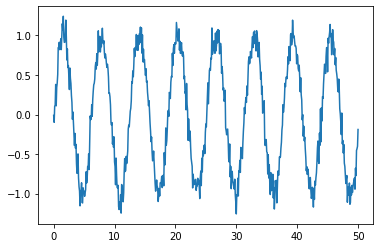

In [64]:
plt.plot(x, y)

In [65]:
df = pd.DataFrame(data=y, index=x, columns=['Sine'])
df

,Sine
0.000000,-0.011256
0.083333,-0.098346
0.166667,0.103942
0.250000,0.120506
0.333333,0.380456
...,...
49.666667,-0.772117
49.750000,-0.453709
49.833333,-0.431516
49.916667,-0.401105


# Train Test Split

In [66]:
test_size = round(len(df) * 0.3)
split_index = len(df) - test_size
split_index

421

In [67]:
train_df = df.iloc[:split_index]
test_df = df.iloc[split_index:]

In [68]:
train_df.tail()

,Sine
34.666667,-0.313137
34.750000,-0.391329
34.833333,-0.316249
34.916667,-0.316986
35.000000,-0.470944


In [69]:
test_df.head()

,Sine
35.083333,-0.481999
35.166667,-0.751517
35.250000,-0.507572
35.333333,-0.801832
35.416667,-0.634191


In [70]:
print(f'Train shape: {train_df.shape}')
print(f'Test shape: {test_df.shape}')

Train shape: (421, 1)
Test shape: (180, 1)


# Scale Data

In [71]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_df)

train = scaler.transform(train_df)
test = scaler.transform(test_df)

# Time Series Generator

In [84]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

length = len(test) - 1
batch_size = 1
generator = TimeseriesGenerator(train, train, length=length, batch_size=batch_size)
validation = TimeseriesGenerator(test, test, length=length, batch_size=batch_size)

In [85]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, SimpleRNN

n_features = 1

model = Sequential()
model.add(SimpleRNN(50, input_shape=(length, n_features)))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [86]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 50)                2600      
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 51        
Total params: 2,651
Trainable params: 2,651
Non-trainable params: 0
_________________________________________________________________


In [87]:
model.fit(generator, epochs=15, validation_data=validation)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 242 steps, validate for 1 steps
Epoch 1/15
242/242 [==============================] - 20s 82ms/step - loss: 0.0061 - val_loss: 4.6788e-06
Epoch 2/15
242/242 [==============================] - 18s 75ms/step - loss: 0.0043 - val_loss: 4.8755e-04
Epoch 3/15
242/242 [==============================] - 18s 75ms/step - loss: 0.0041 - val_loss: 0.0033
Epoch 4/15
242/242 [==============================] - 18s 75ms/step - loss: 0.0032 - val_loss: 0.0011
Epoch 5/15
242/242 [==============================] - 19s 79ms/step - loss: 0.0037 - val_loss: 0.0019
Epoch 6/15
242/242 [==============================] - 19s 81ms/step - loss: 0.0038 - val_loss: 8.4587e-04
Epoch 7/15
242/242 [==============================] - 19s 81ms/step - loss: 0.0033 - val_loss: 0.0055
Epoch 8/15
242/242 [==============================] - 20s 82ms/step - loss: 0.0036 - val_loss: 0.0014
Epoch 9/15
242/242 [==============================] - 20s 82ms/step - loss: 0.00

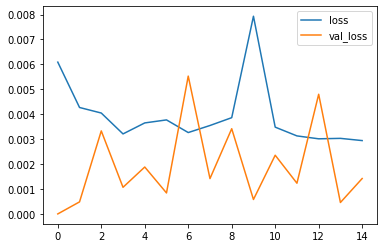

In [88]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [89]:
first_eval_batch = train[-length:]
# first_eval_batch

In [90]:
first_eval_batch = first_eval_batch.reshape((1, length, n_features))

print(f"Model prediction: {model.predict(first_eval_batch)}")
print(f"True value: {test[0]}")

Model prediction: [[0.25809896]]
True value: [0.30983544]


In [91]:
test_predictions = []

first_eval_batch = train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [92]:
# test_predictions

In [93]:
test_pred = scaler.inverse_transform(test_predictions)
# test_pred

In [94]:
test_df['pred'] = test_pred
test_df.head()

/home/fares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Sine,pred
35.083333,-0.481999,-0.611274
35.166667,-0.751517,-0.660143
35.250000,-0.507572,-0.699731
35.333333,-0.801832,-0.761439
35.416667,-0.634191,-0.861958


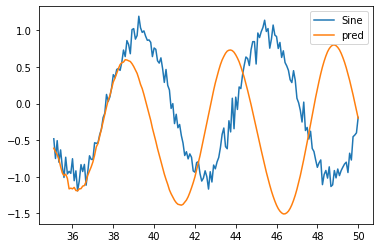

In [95]:
test_df.plot()

# Training LSTM model

In [96]:
model_1 = Sequential()
model_1.add(LSTM(50, activation='relu', input_shape=(length, n_features)))
model_1.add(Dense(1))

model_1.compile(optimizer='adam', loss='mse')

In [97]:
model_1.fit(generator, epochs=20, validation_data=validation)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 242 steps, validate for 1 steps
Epoch 1/20
242/242 [==============================] - 37s 154ms/step - loss: 0.0375 - val_loss: 0.0074
Epoch 2/20
242/242 [==============================] - 35s 145ms/step - loss: 0.0046 - val_loss: 0.0114
Epoch 3/20
242/242 [==============================] - 36s 148ms/step - loss: 0.0038 - val_loss: 0.0084
Epoch 4/20
242/242 [==============================] - 36s 150ms/step - loss: 0.0031 - val_loss: 0.0031
Epoch 5/20
242/242 [==============================] - 35s 146ms/step - loss: 0.0030 - val_loss: 0.0034
Epoch 6/20
242/242 [==============================] - 34s 141ms/step - loss: 0.0028 - val_loss: 0.0044
Epoch 7/20
242/242 [==============================] - 35s 146ms/step - loss: 0.0029 - val_loss: 0.0066
Epoch 8/20
242/242 [==============================] - 35s 146ms/step - loss: 0.0031 - val_loss: 5.3797e-04
Epoch 9/20
242/242 [==============================] - 35s 146ms/step - loss: 0.0

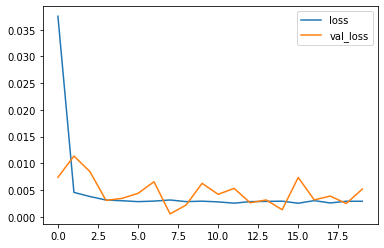

In [98]:
losses = pd.DataFrame(model_1.history.history)
losses.plot()

In [99]:
test_predictions = []

first_eval_batch = train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):
    current_pred = model_1.predict(current_batch)[0]
    test_predictions.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [100]:
test_pred = scaler.inverse_transform(test_predictions)
test_df['LSTM'] = test_pred

/home/fares/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


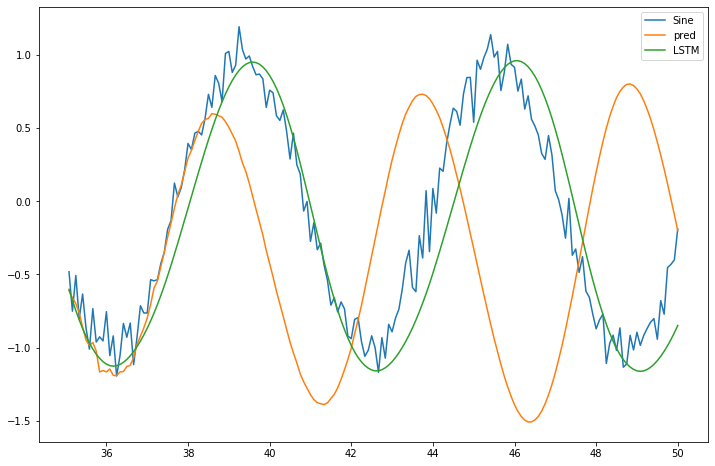

In [101]:
test_df.plot(figsize=(12, 8));

# Forecasting

In [102]:
full_scaler = MinMaxScaler()
scaled_df = full_scaler.fit_transform(df)

length = 150
generator = TimeseriesGenerator(scaled_df, scaled_df, length=length, batch_size=1)

In [103]:
model_1 = Sequential()
model_1.add(LSTM(50, input_shape=(length, n_features)))
model_1.add(Dense(1))

model_1.compile(optimizer='adam', loss='mse')

model_1.fit(generator, epochs=10)

  ...
    to  
  ['...']
Train for 451 steps
Epoch 1/10
451/451 [==============================] - 52s 114ms/step - loss: 0.0132
Epoch 2/10
451/451 [==============================] - 49s 109ms/step - loss: 0.0028
Epoch 3/10
451/451 [==============================] - 53s 117ms/step - loss: 0.0029
Epoch 4/10
451/451 [==============================] - 50s 110ms/step - loss: 0.0032
Epoch 5/10
451/451 [==============================] - 50s 111ms/step - loss: 0.0029
Epoch 6/10
451/451 [==============================] - 50s 111ms/step - loss: 0.0028
Epoch 7/10
451/451 [==============================] - 50s 111ms/step - loss: 0.0027
Epoch 8/10
451/451 [==============================] - 50s 111ms/step - loss: 0.0029
Epoch 9/10
451/451 [==============================] - 50s 111ms/step - loss: 0.0027
Epoch 10/10
451/451 [==============================] - 50s 112ms/step - loss: 0.0026


In [104]:
forecast = []
periods = 400
first_eval_batch = scaled_df[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(periods):
    current_pred = model_1.predict(current_batch)[0]
    forecast.append(current_pred)
    current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

In [105]:
400 * 0.1

40.0

In [106]:
forecast = full_scaler.inverse_transform(forecast)
forecast_index = np.arange(50.1, 90.1, step=0.1)

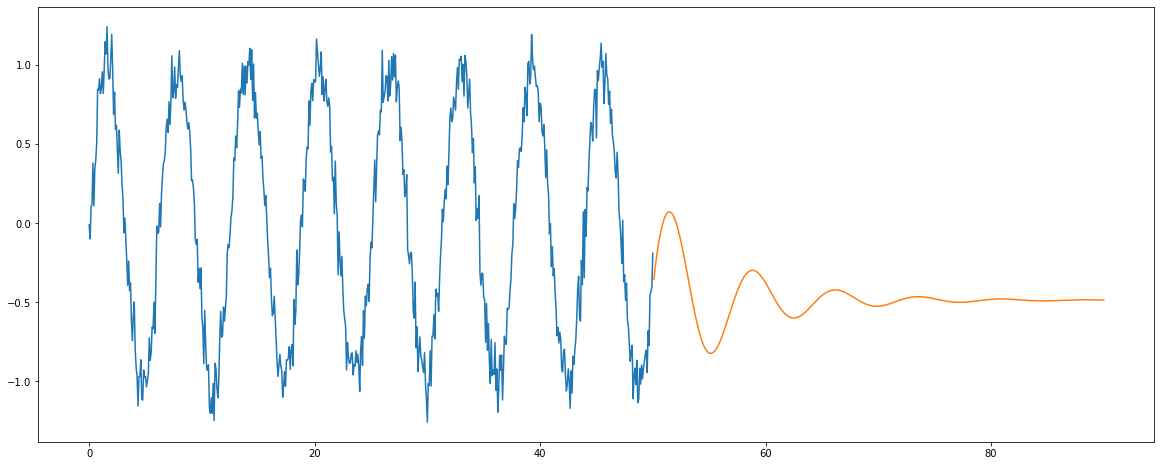

In [107]:
plt.figure(figsize=(20, 8))
plt.plot(df.index, df['Sine'])
plt.plot(forecast_index, forecast)